# Under Pressure: Dampened Harmonic Oscillation of a Fluid

This is a project to analyze the effect of dampened harmonic oscillation as it relates to water contained in a straw.

## Introduction

The nature of fluid dynamics and Newton's second law creates a curious (and fun) property where it is possible to submerge a straw into a body of fluid without causing the internal volume of fluid within the straw to rise by sealing the air pressure within the straw with an object (such as your thumb). Releasing the seal on the straw will then cause fluid to rush into the straw, which has similar properties to dampened harmonic oscillation experienced by an object attached to a string. It is possible to visualize this effect with a computational model. 

## Computational Model

The equation for the dampened harmonic oscillation in regards to fluid dynamics can be mathematically framed with the following equation:
$$
\ddot{z} = -\frac{1}{z}(\dot{z}^2 + gz - gh + \dot{bz})
$$
where $\ddot{z}$ is equal to the acceleration of the fluid in the straw, $\dot{z}$ is equal to the velocity of the fluid in the straw, $z$ is equal to the position of the fluid in the straw, $g$ is equal to the force of gravity (-9.81m/s on Earth), $h$ is the depth of the straw below the bottom of the surface of the fluid, and $b$ is the damping coefficient. 

For this model, let us assume we are using a boba straw. A boba straw is 12.19mm wide with a standard length of 21.59cm. Let us assume that half the straw is submerged in the straw, such that $h = \frac{0.2159}{2} = 0.10795$.

The damping coefficient $b$ is based on the fluid itself. The fluid can be neutral water with a default density of 1kg/m^3. It is possible to mathematically calculate the damping coefficient of the fluid, which is based on the fluid viscosity and straw size, but this is a much more difficult task than visually measuring the motion of the fluid. It is also possible to add in arbitrary damping coefficients to simulate different functions and demonstrate how the harmonic oscillation scales with the fluid's damping coefficient.

## Results and Discussion

In [37]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [38]:
def initialPosition(positionConstants): #Determines initial fluid position x
    P = positionConstants[0] # Atmospheric pressure in g/cm^2
    rho = positionConstants[1] # Fluid density in g/cm^3
    h = positionConstants[2] # Length of straw submerged in water in cm
    H = positionConstants[3] # Total length of straw in cm
    return (1 - P/(rho*h + P)) * H # Final calculation

positionConstants = [1033.227, 1, 10.795, 21.59]

initialPosition(positionConstants) # Initial fluid position in cm

0.2232367229809354

In [88]:
def harmonicFluid(X, t, constants): # 2nd order differential equation solving for dampened harmonic motion
    g = constants[0] # Gravitational force on Earth in cm/s^2
    h = constants[1] # Length of straw submerged in water in cm
    b = constants[2] # Damping coefficient
    x, v = X # Initial parameters
    return [v, -v**2/x - g +g*h/x -b*v/x ]

constants = [981, 10.795, 23]
t = np.arange(0, 6, 0.01)
X = [initialPosition(positionConstants), 0]

waterOscillate = odeint(harmonicFluid, X, t, args=(constants,))
waterOscillate

array([[2.23236723e-01, 0.00000000e+00],
       [9.59562189e-01, 8.71512191e+01],
       [1.82483287e+00, 8.54612467e+01],
       ...,
       [1.07850820e+01, 1.17909430e-02],
       [1.07852432e+01, 2.04013073e-02],
       [1.07854888e+01, 2.86460617e-02]])

Text(0, 0.5, 'Position (cm)')

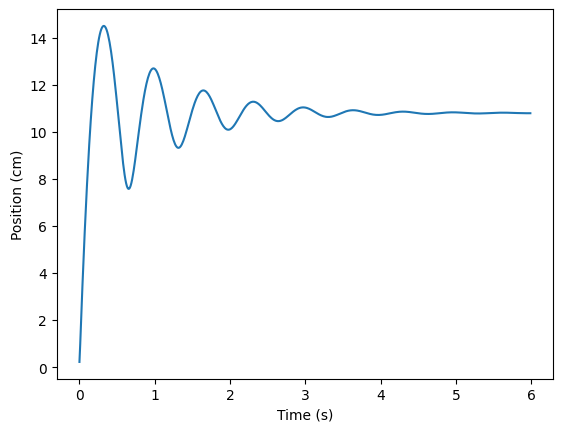

In [89]:
fig, ax = plt.subplots()
ax.plot(t, waterOscillate[:,0])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Position (cm)")

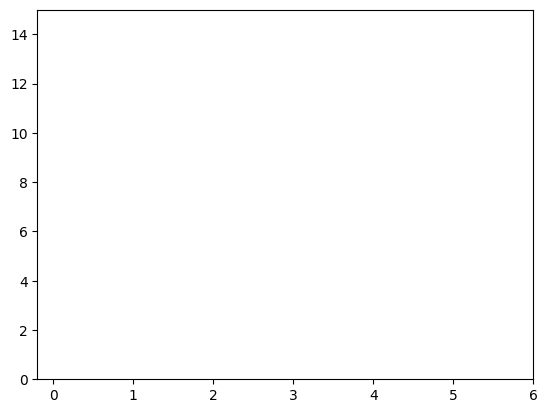

In [90]:
fig = plt.figure() 
axis = plt.axes(xlim =(-0.2,6), 
                ylim =(0,15)) 
line1, = axis.plot(t, waterOscillate[:,0])
line2, = axis.plot(t, waterOscillate[:,1])

def func(i):
    x1 = [t[:i]]
    y1 = [waterOscillate[:,0][:i]]
    y2 = [waterOscillate[:,1][:i]]
    line1.set_data(x1, y1) 
    line2.set_data(x1,y2)
    return (line1, line2)

ani = animation.FuncAnimation(fig, func, repeat=True, frames=600, interval=50)
writer = animation.PillowWriter(fps=50,metadata=dict(artist='Darren Low'),bitrate=3000)
ani.save('fluidHarmonicMotion.gif', writer=writer)

## Summary

This project demonstrates the relationship between three forces acting in tandem: pressure force, gravitational force, and dampening force. We can derive an equation to visualize this phenomenon from Newton's 2nd Law, giving us a 2nd order differential equation that can be solved with Python and the odeint function. This visualization gives us insight into fluid dynamics in action and how they apply to us.